# Hashed Shading - Seed analysis

In this chapter we analyse the influence of the seed of the random generator on the performance of the linkless octree. We hypothesise that the influence of a seed should be neglible.

In [7]:
import json
from pathlib import Path

import pandas as pd
import numpy as np

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf', 'svg')
matplotlib.rcParams['svg.fonttype'] = 'none'

In [9]:
RAW_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/hashed_memory_seed/")

SCENES = { "pipers-alley" : [ "58#1x_1y_1z"
                            , "1044#3x_3y_2z"
                            ]
         , "ziggurat-city" : [ "65#1x_1y_1z"
                             , "1170#3x_3y_2z"
                             ]
         , "spaceship-indoor" : [ "70#1x_1y_1z"
                                , "1260#3x_3y_2z"
                                ]
         }


SEEDS = [22,
         382504079,
         456592902,
         262626910,
         859032165,
         731052759,
         332987239,
         170139950,
         313404752,
         833956794,
        ]

STARTING_DEPTH = [0,]
    
LIGHT_SIZE = { "pipers-alley":  180.0
             , "ziggurat-city": 10.0
             , "spaceship-indoor": 16.0
             }

NODE_SIZES = [1.0 / 4,
              1.0 / 2,
              1.0 * 1,
              1.0 * 2,
             ]

n_tests = 3

In [10]:
def extract_seed_execution_times():
    output = {}
    
    for scene in SCENES:
        output[scene] = {}
        
        path_scene = RAW_DATA_ROOT / Path(scene)
        for ld in SCENES[scene]:
            output[scene][ld] = {}
            
            path_ld = path_scene / Path(ld) / Path("{}".format(STARTING_DEPTH[0]))
            for ns in NODE_SIZES:
                path_ns = path_ld / Path("{}/1.5/".format(ns))
                
                l_execution_time = []
                l_seeds = []
                
                for seed in SEEDS:
                    path_seed = path_ns / Path("{}".format(seed))
                    
                    for i in range(n_tests):                  
                        l_seeds.append(seed)                  
                        
                        file_path = path_seed / Path("execution_{}.json".format(i))
                        with open(str(file_path), 'r') as f:
                            data_json = json.loads(f.read())
                                                
                        l_execution_time.append(data_json["frames"][0]["functions"]["HashedLightManager::constructLinklessOctree"])
                        
                df_raw = {"seed": pd.Series(l_seeds),
                          "execution_time": pd.Series(l_execution_time)
                         }
                output[scene][ld][ns] = pd.DataFrame(df_raw)
    
    return output

In [11]:
seed_execution_time = extract_seed_execution_times()

In [12]:
df = seed_execution_time["pipers-alley"]["1044#3x_3y_2z"][1.0 / 4]

In [13]:
df.groupby("seed", as_index = False).mean()

seed  execution_time
0         22       12.163429
1  170139950       12.130902
2  262626910       11.837239
3  313404752       12.655544
4  332987239       11.903478
5  382504079       12.381766
6  456592902       11.789568
7  731052759       13.011231
8  833956794       12.094425
9  859032165       11.378441

In [14]:
"test#3333".split('#')[0]

'test'

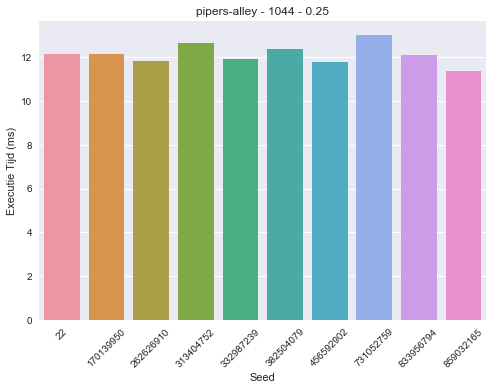

In [15]:
bp = sns.barplot(df["seed"], y=df["execution_time"], ci=None)

for item in bp.get_xticklabels():
    item.set_rotation(45)
    
bp.set(xlabel='Seed', ylabel='Executie Tijd (ms)')
bp.set_title("{} - {} - {}".format("pipers-alley", "1044", (1.0 / 4)))

plt.show()

In [16]:
def bar_plot_execution_time(scene, light_def, node_size):
    df = seed_execution_time[scene][light_def][node_size]
    
    bp = sns.barplot(df["seed"], y=df["execution_time"], ci=None)
    
    for item in bp.get_xticklabels():
        item.set_rotation(45)  
        
    bp.set(xlabel='Seed', ylabel='Executie Tijd (ms)')
    bp.set_title("{} - {} - {}".format(scene, 
                                       light_def.split('#')[0], 
                                       node_size))
    plt.show()
    

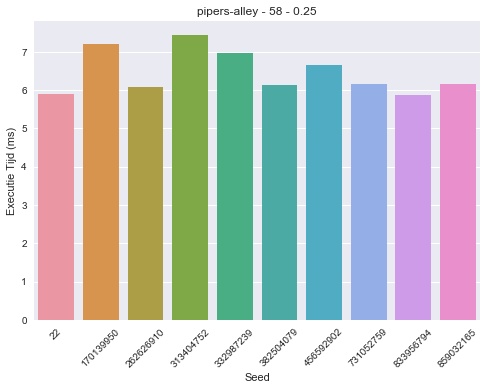

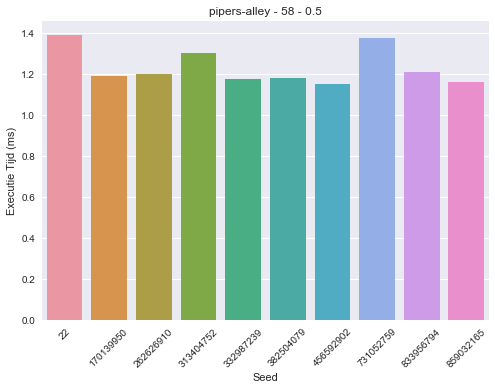

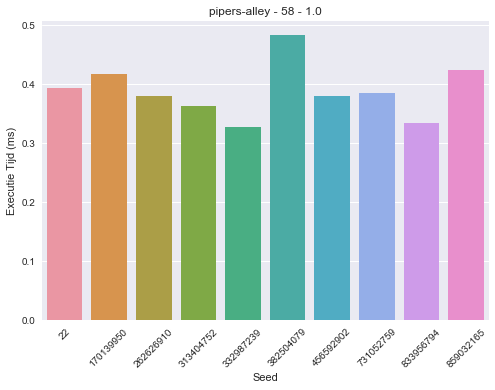

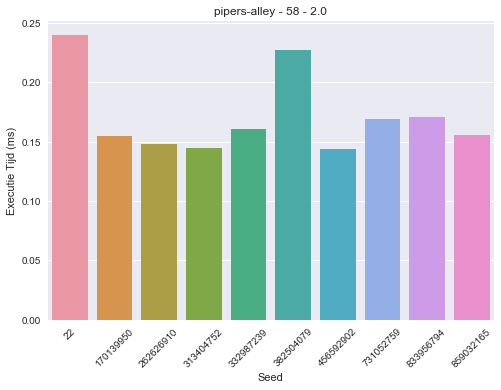

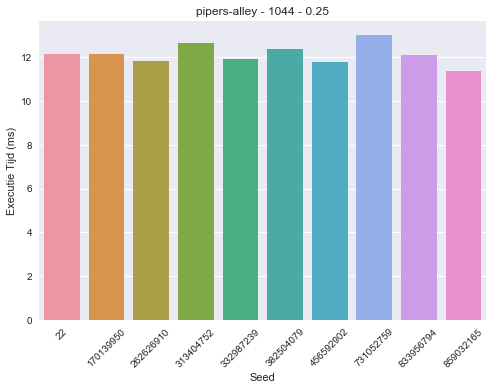

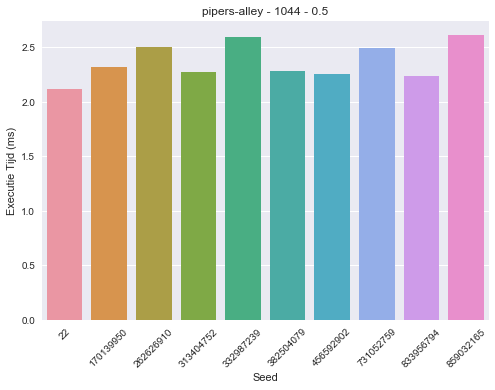

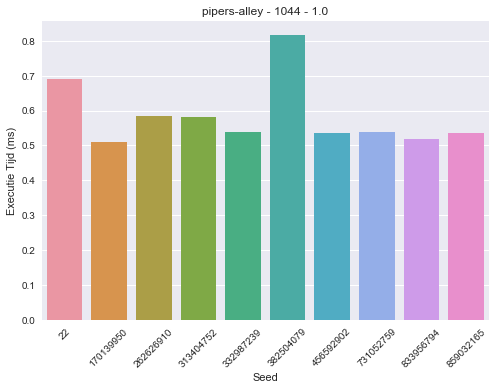

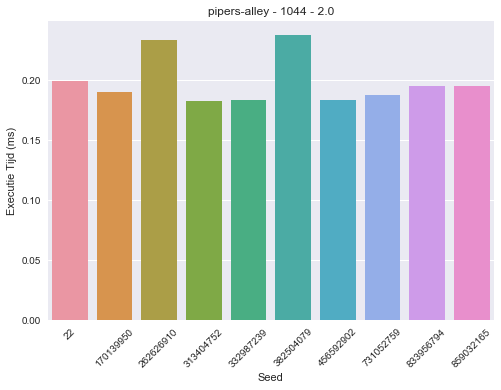

In [17]:
scene = "pipers-alley"
for l_def in SCENES[scene]:
    for ns in NODE_SIZES:
        bar_plot_execution_time(scene, l_def, ns)

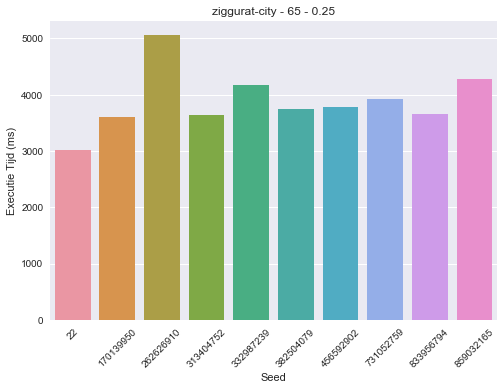

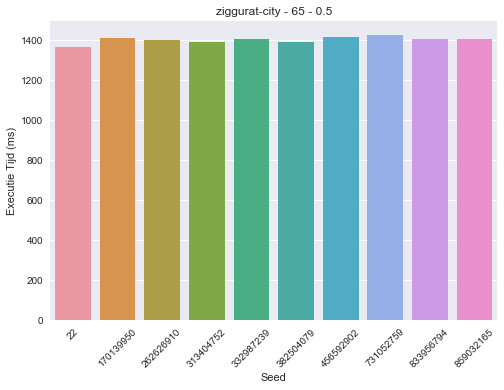

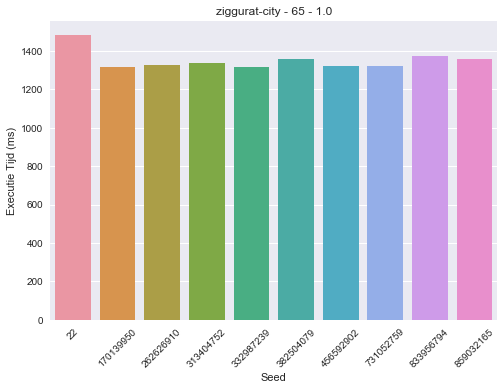

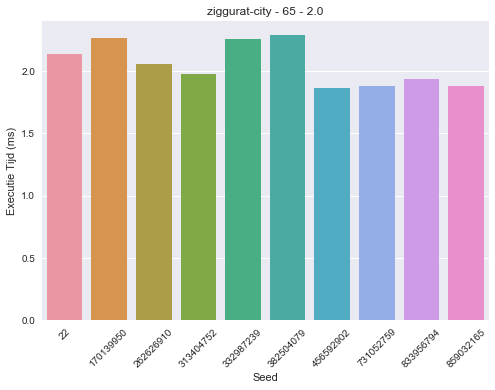

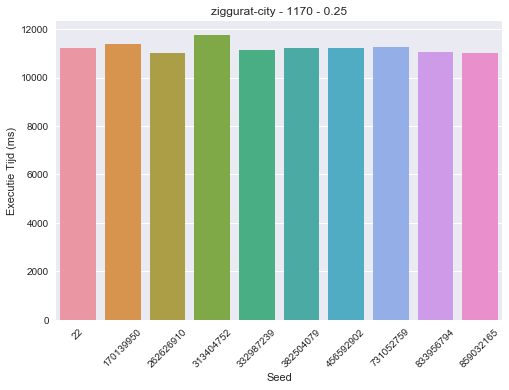

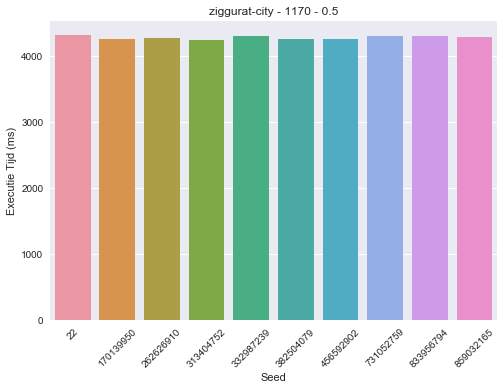

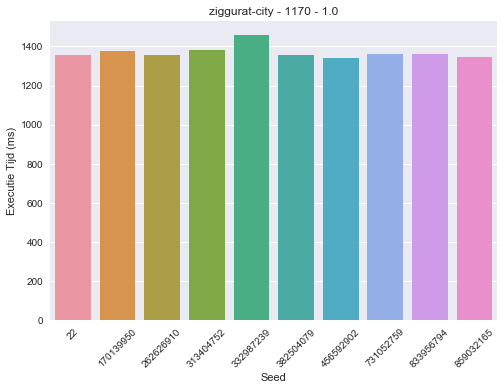

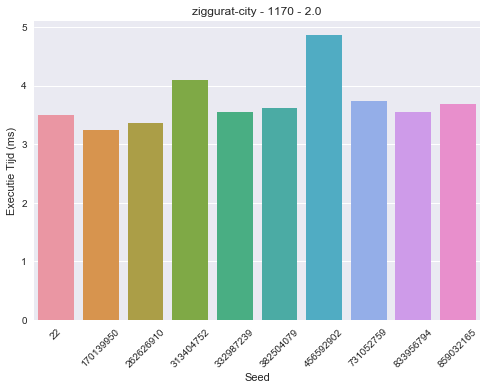

In [18]:
scene = "ziggurat-city"
for l_def in SCENES[scene]:
    for ns in NODE_SIZES:
        bar_plot_execution_time(scene, l_def, ns)

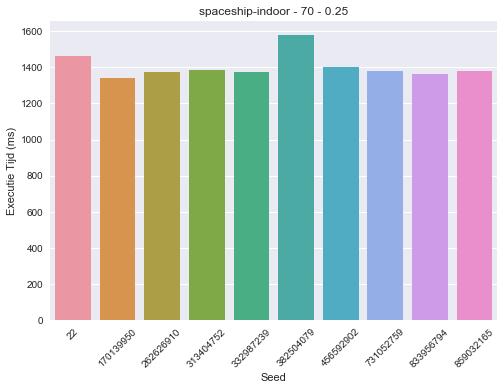

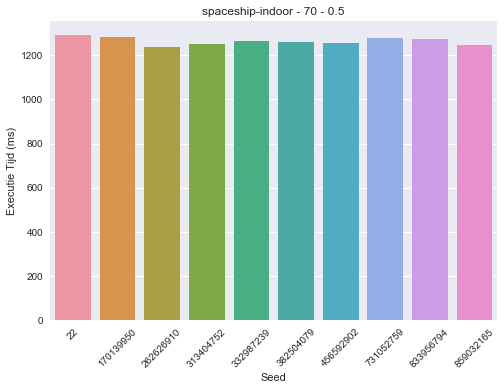

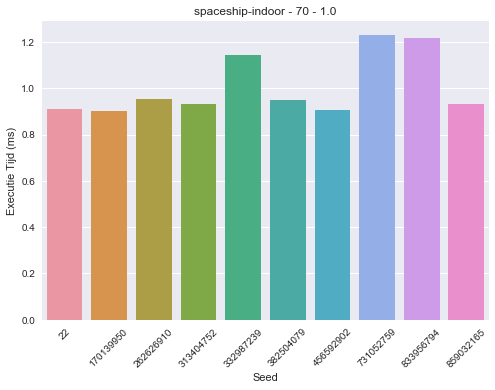

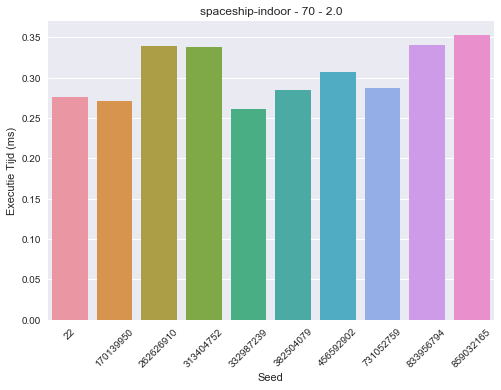

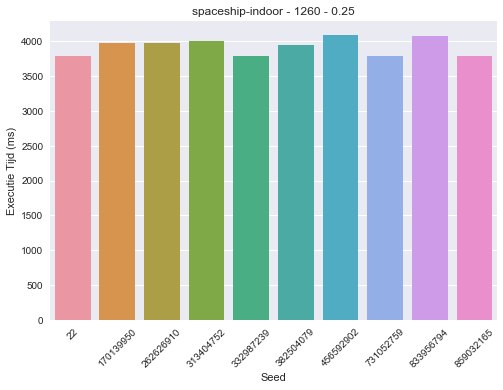

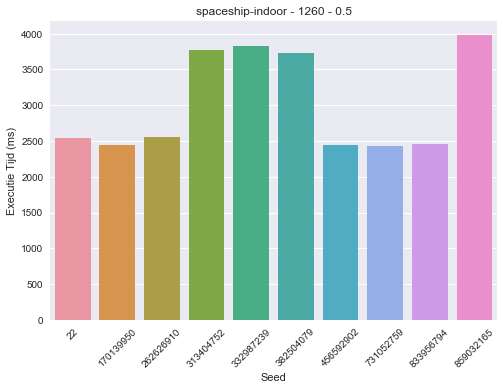

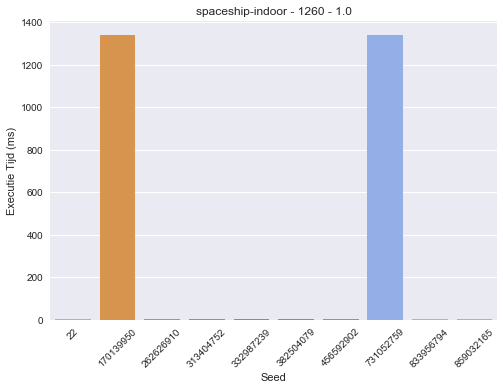

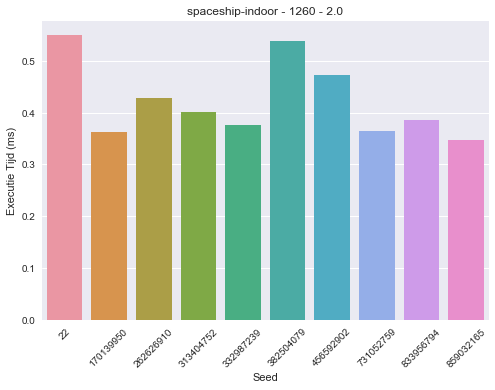

In [19]:
scene = "spaceship-indoor"
for l_def in SCENES[scene]:
    for ns in NODE_SIZES:
        bar_plot_execution_time(scene, l_def, ns)

In [20]:
def extract_seed_memory_tables():
    output = {}
    
    for scene in SCENES:
        output[scene] = {}
        
        path_scene = RAW_DATA_ROOT / Path(scene)
        for ld in SCENES[scene]:
            output[scene][ld] = {}
            
            path_ld = path_scene / Path(ld) / Path("{}".format(STARTING_DEPTH[0]))
            for ns in NODE_SIZES:
                path_ns = path_ld / Path("{}/1.5/".format(ns))

                file_path = path_ns / Path("22/memory_0.json")
                with open(str(file_path), 'r') as f:
                    data_json = json.loads(f.read())
                    
                
                n_levels = data_json["linkless_octree"]["n_levels"]
                
                dat = {}
                for seed in SEEDS:
                    file_path = path_ns / Path("{}".format(seed)) / Path("memory_0.json")
                    with open(str(file_path), 'r') as f:
                        data_json = json.loads(f.read())
                    dat[seed] = data_json["linkless_octree"]["tables"]
                
                df_lvls = []
                for i in range(n_levels):
                    seedlets = []
                    t = []
                    mem = []
                    
                    for seed in SEEDS:
                        # append 
                        seedlets.append(seed)
                        t.append("m octree")
                        mem.append(dat[seed][i]["octree_table"]["m"]) # ** 3)
                        
                        seedlets.append(seed)
                        t.append("r octree")
                        mem.append(dat[seed][i]["octree_table"]["r"]) # ** 3)
                        
                        seedlets.append(seed)
                        t.append("m data")
                        seedlets.append(seed)
                        t.append("r data")
                        if dat[seed][i]["data_table"]["exists"]:
                            mem.append(dat[seed][i]["data_table"]["m"]) # ** 3)
                            mem.append(dat[seed][i]["data_table"]["r"]) # ** 3)
                        else:
                            mem.append(0)
                            mem.append(0)
                    df_raw = {"seed": pd.Series(seedlets),
                              "datatype": pd.Series(t),
                              "mem_usage": pd.Series(mem)
                             }
                    df_lvls.append(pd.DataFrame(df_raw))
                output[scene][ld][ns] = df_lvls            
    return output 

In [21]:
seed_memory = extract_seed_memory_tables()

In [22]:
df = seed_memory["pipers-alley"]["58#1x_1y_1z"][0.25][-2]
df

datatype  mem_usage       seed
0   m octree          7         22
1   r octree          5         22
2     m data          3         22
3     r data          5         22
4   m octree          7  382504079
5   r octree          5  382504079
6     m data          3  382504079
7     r data          5  382504079
8   m octree          7  456592902
9   r octree          5  456592902
10    m data          3  456592902
11    r data          5  456592902
12  m octree          7  262626910
13  r octree          5  262626910
14    m data          3  262626910
15    r data          5  262626910
16  m octree          7  859032165
17  r octree          5  859032165
18    m data          3  859032165
19    r data          5  859032165
20  m octree          7  731052759
21  r octree          5  731052759
22    m data          3  731052759
23    r data          5  731052759
24  m octree          7  332987239
25  r octree          5  332987239
26    m data          3  332987239
27    r data          5  332987239
28  m octree          7  170139950
29  r octree          5  170139950
30    m data          3  170139950
31    r data          5  170139950
32  m octree          7  313404752
33  r octree          5  313404752
34    m data          3  313404752
35    r data          5  313404752
36  m octree          7  833956794
37  r octree          5  833956794
38    m data          3  833956794
39    r data          5  833956794

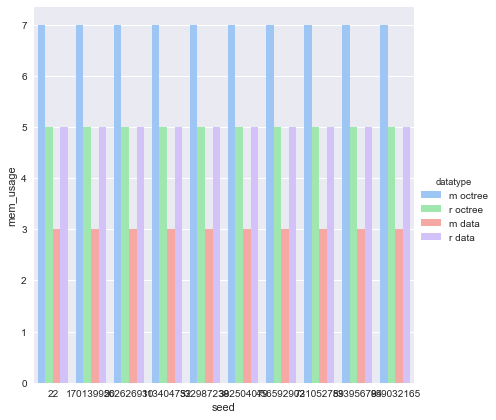

In [23]:
g = sns.factorplot(x="seed", y="mem_usage", hue="datatype", data=df, kind="bar", size=6, palette="pastel", saturation=.8)
plt.show()

In [102]:
df1 = seed_memory["pipers-alley"]["58#1x_1y_1z"][0.25][0]
df1

datatype  mem_usage       seed
0   m octree          1         22
1   r octree          1         22
2     m data          0         22
3     r data          0         22
4   m octree          1  382504079
5   r octree          1  382504079
6     m data          0  382504079
7     r data          0  382504079
8   m octree          1  456592902
9   r octree          1  456592902
10    m data          0  456592902
11    r data          0  456592902
12  m octree          1  262626910
13  r octree          1  262626910
14    m data          0  262626910
15    r data          0  262626910
16  m octree          1  859032165
17  r octree          1  859032165
18    m data          0  859032165
19    r data          0  859032165
20  m octree          1  731052759
21  r octree          1  731052759
22    m data          0  731052759
23    r data          0  731052759
24  m octree          1  332987239
25  r octree          1  332987239
26    m data          0  332987239
27    r data          0  332987239
28  m octree          1  170139950
29  r octree          1  170139950
30    m data          0  170139950
31    r data          0  170139950
32  m octree          1  313404752
33  r octree          1  313404752
34    m data          0  313404752
35    r data          0  313404752
36  m octree          1  833956794
37  r octree          1  833956794
38    m data          0  833956794
39    r data          0  833956794

In [103]:
df2 = seed_memory["pipers-alley"]["58#1x_1y_1z"][0.25][1]
df2

datatype  mem_usage       seed
0   m octree          3         22
1   r octree          1         22
2     m data          0         22
3     r data          0         22
4   m octree          3  382504079
5   r octree          1  382504079
6     m data          0  382504079
7     r data          0  382504079
8   m octree          3  456592902
9   r octree          1  456592902
10    m data          0  456592902
11    r data          0  456592902
12  m octree          3  262626910
13  r octree          1  262626910
14    m data          0  262626910
15    r data          0  262626910
16  m octree          3  859032165
17  r octree          1  859032165
18    m data          0  859032165
19    r data          0  859032165
20  m octree          3  731052759
21  r octree          1  731052759
22    m data          0  731052759
23    r data          0  731052759
24  m octree          3  332987239
25  r octree          1  332987239
26    m data          0  332987239
27    r data          0  332987239
28  m octree          3  170139950
29  r octree          1  170139950
30    m data          0  170139950
31    r data          0  170139950
32  m octree          3  313404752
33  r octree          1  313404752
34    m data          0  313404752
35    r data          0  313404752
36  m octree          3  833956794
37  r octree          1  833956794
38    m data          0  833956794
39    r data          0  833956794

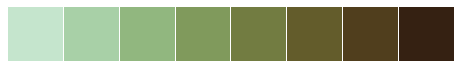

In [120]:
sns.palplot(sns.cubehelix_palette(8, start=1.0))
plt.show()

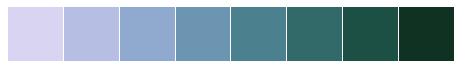

In [117]:
sns.palplot(sns.cubehelix_palette(8, start=2.0))
plt.show()

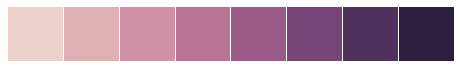

In [119]:
sns.palplot(sns.cubehelix_palette(8, start=0.0))
plt.show()

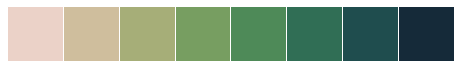

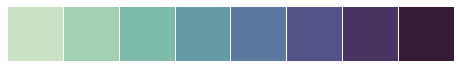

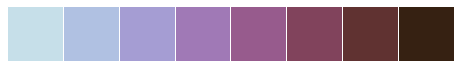

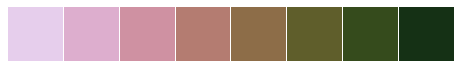

In [145]:
sns.palplot(sns.cubehelix_palette(8, start=0, rot=-.75))
sns.palplot(sns.cubehelix_palette(8, start=0.75, rot=-.75))
sns.palplot(sns.cubehelix_palette(8, start=1.5, rot=-.75))
sns.palplot(sns.cubehelix_palette(8, start=2.25, rot=-.75))
plt.show()

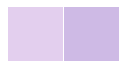

In [129]:
sns.palplot(sns.cubehelix_palette(10, start=2.25)[0:2])
plt.show()

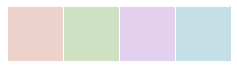

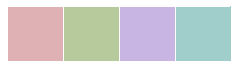

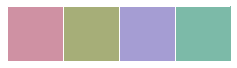

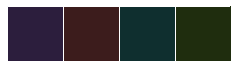

In [134]:
sns.palplot(sns.color_palette([sns.cubehelix_palette(8, start=0.00)[0], 
                               sns.cubehelix_palette(8, start=0.75)[0],
                               sns.cubehelix_palette(8, start=2.25)[0],
                               sns.cubehelix_palette(8, start=1.5)[0],
                              ]))

sns.palplot(sns.color_palette([sns.cubehelix_palette(8, start=0.00)[1], 
                               sns.cubehelix_palette(8, start=0.75)[1],
                               sns.cubehelix_palette(8, start=2.25)[1],
                               sns.cubehelix_palette(8, start=1.5)[1],
                              ]))
sns.palplot(sns.color_palette([sns.cubehelix_palette(8, start=0.00)[2], 
                               sns.cubehelix_palette(8, start=0.75)[2],
                               sns.cubehelix_palette(8, start=2.25)[2],
                               sns.cubehelix_palette(8, start=1.5)[2],
                              ]))
sns.palplot(sns.color_palette([sns.cubehelix_palette(8, start=0.00)[-1], 
                               sns.cubehelix_palette(8, start=0.75)[-1],
                               sns.cubehelix_palette(8, start=2.25)[-1],
                               sns.cubehelix_palette(8, start=1.5)[-1],
                              ]))


plt.show()

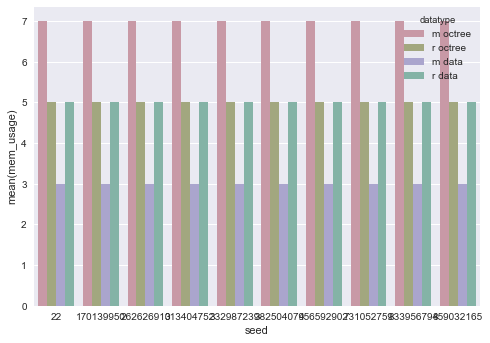

In [141]:
pal_0 = sns.color_palette([sns.cubehelix_palette(8, start=0.00)[2], 
                               sns.cubehelix_palette(8, start=0.75)[2],
                               sns.cubehelix_palette(8, start=2.25)[2],
                               sns.cubehelix_palette(8, start=1.5)[2],
                              ])
pal_1 = sns.color_palette([sns.cubehelix_palette(8, start=0.00)[2], 
                               sns.cubehelix_palette(8, start=0.75)[2],
                               sns.cubehelix_palette(8, start=2.25)[2],
                               sns.cubehelix_palette(8, start=1.5)[2],
                              ])

sns.barplot(x="seed", y="mem_usage", hue="datatype", data=df, palette=pal_0)
#g = sns.factorplot(x="seed", y="mem_usage", hue="datatype", data=df, kind="bar", size=6, palette=pal_1, saturation=.8)
plt.show()

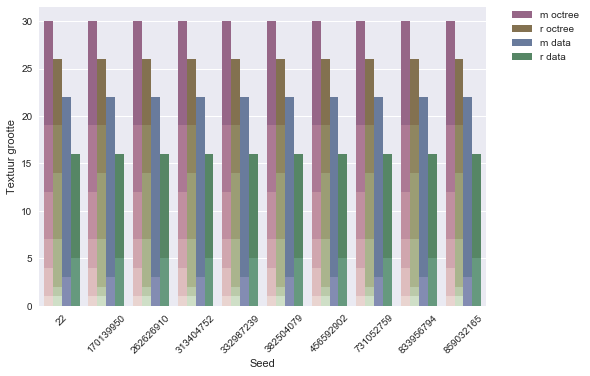

In [172]:
dfs = seed_memory["pipers-alley"]["58#1x_1y_1z"][0.25]

# build dataframes
df_summed = [dfs[0],]

for df in dfs[1:]:
    new_frame = df_summed[-1].copy()
    new_frame["mem_usage"] += df["mem_usage"]
    df_summed.append(new_frame)
    
n_levels = len(dfs)

palettes = [ sns.cubehelix_palette(int(n_levels * 1.75), start=0.00), 
             sns.cubehelix_palette(int(n_levels * 1.75), start=0.75),
             sns.cubehelix_palette(int(n_levels * 1.75), start=2.25),
             sns.cubehelix_palette(int(n_levels * 1.75), start=1.5),
           ]

for i in range(n_levels -1, -1, -1):
    palette = sns.color_palette([palettes[0][i],
                                 palettes[1][i],
                                 palettes[2][i],
                                 palettes[3][i],])
    bp = sns.barplot(x="seed", 
                     y="mem_usage", 
                     hue="datatype", 
                     data=df_summed[i], 
                     palette=palette)

for item in bp.get_xticklabels():
    item.set_rotation(45)  
        
bp.set(xlabel='Seed', ylabel='Textuur grootte')

m_octree_patch = mpatches.Patch(color=palettes[0][-1], label='m octree')
r_octree_patch = mpatches.Patch(color=palettes[1][-1], label='r octree')
m_data_patch = mpatches.Patch(color=palettes[2][-1], label='m data')
r_data_patch = mpatches.Patch(color=palettes[3][-1], label='r data')

#bp.legend_.remove()
#bp.legend(handles=[m_octree_patch,])# r_octree_patch, m_data_patch, r_data_patch])
handles, labels = bp.get_legend_handles_labels()
bp.legend(handles[:4], labels[:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()
    
    

In [167]:
def bar_plot_mem_usage(scene, light_def, node_size):
    dfs = seed_memory[scene][light_def][node_size]
    
    # build dataframes
    df_summed = [dfs[0],]
    
    for df in dfs[1:]:
        new_frame = df_summed[-1].copy()
        new_frame["mem_usage"] += df["mem_usage"]
        df_summed.append(new_frame)  
    
    n_levels = len(dfs)
    palettes = [sns.cubehelix_palette(int(n_levels * 1.75), start=0.00), 
                sns.cubehelix_palette(int(n_levels * 1.75), start=0.75),
                sns.cubehelix_palette(int(n_levels * 1.75), start=2.25),
                sns.cubehelix_palette(int(n_levels * 1.75), start=1.5),
               ]
    
    for i in range(n_levels -1, -1, -1):
        palette = sns.color_palette([palettes[0][i],
                                     palettes[1][i],
                                     palettes[2][i],
                                     palettes[3][i],])
        bp = sns.barplot(x="seed", 
                         y="mem_usage", 
                         hue="datatype", 
                         data=df_summed[i], 
                         palette=palette)
        
    for item in bp.get_xticklabels():
        item.set_rotation(45)  
        
    bp.set(xlabel='Seed', ylabel='Textuur grootte')
        
    handles, labels = bp.get_legend_handles_labels()
    bp.legend(handles[:4], labels[:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    bp.set_title("{} - {} - {}".format(scene, 
                                       light_def.split('#')[0], 
                                       node_size))

    plt.show()

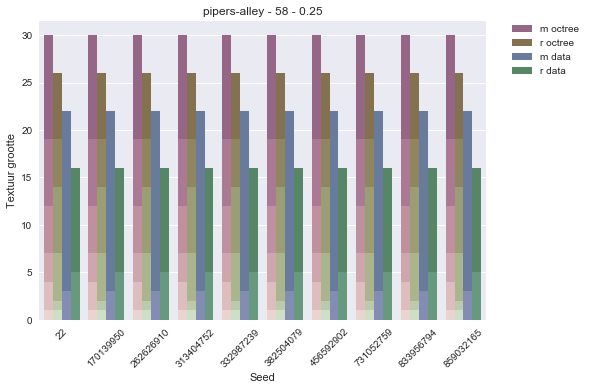

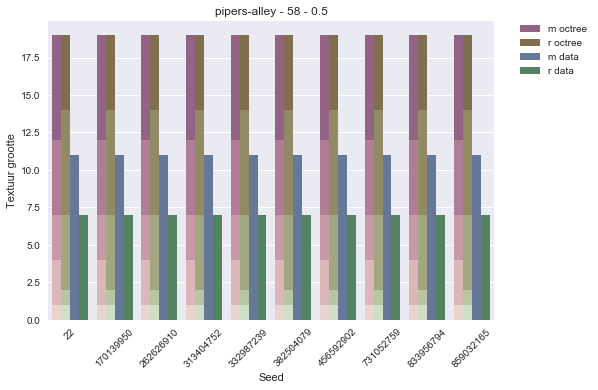

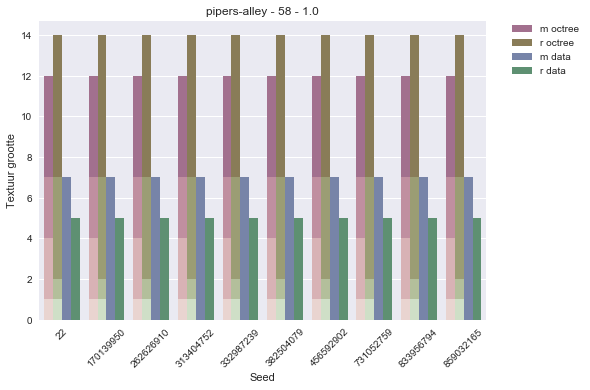

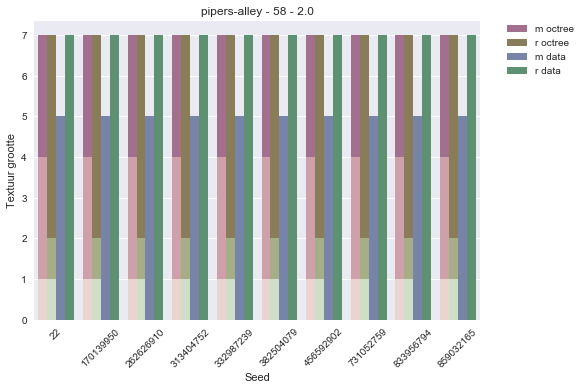

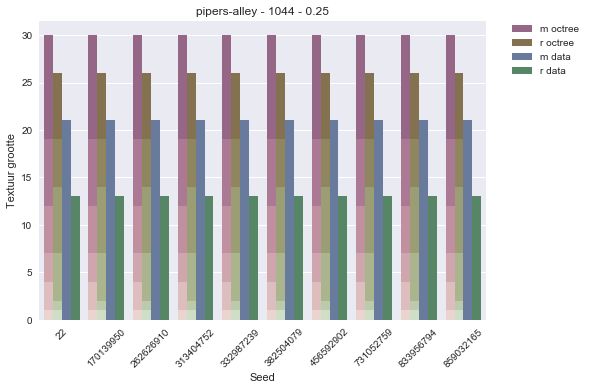

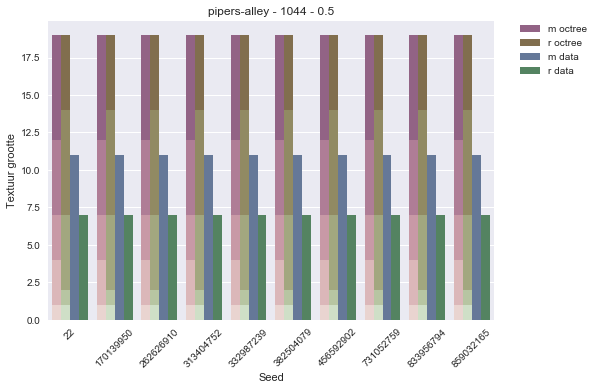

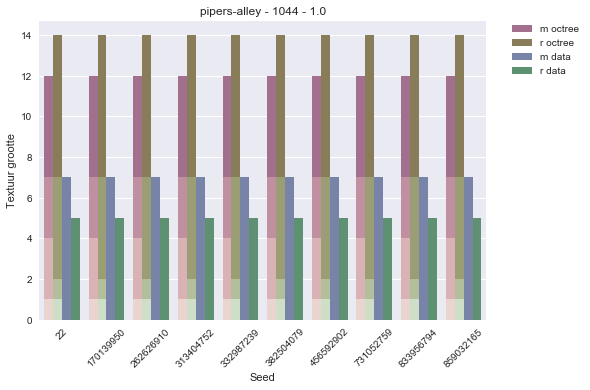

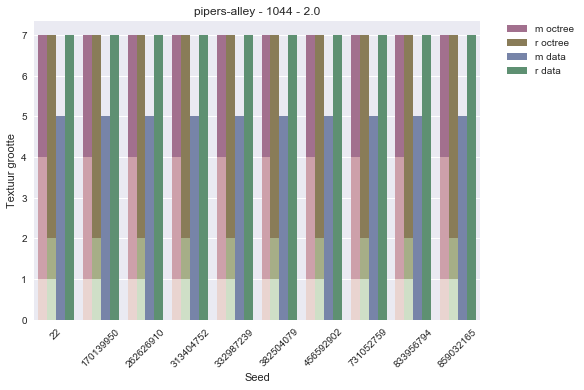

In [169]:
scene = "pipers-alley"
for l_def in SCENES[scene]:
    for ns in NODE_SIZES:
        bar_plot_mem_usage(scene, l_def, ns)

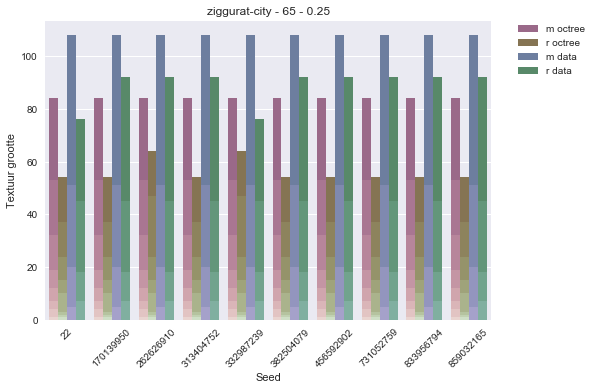

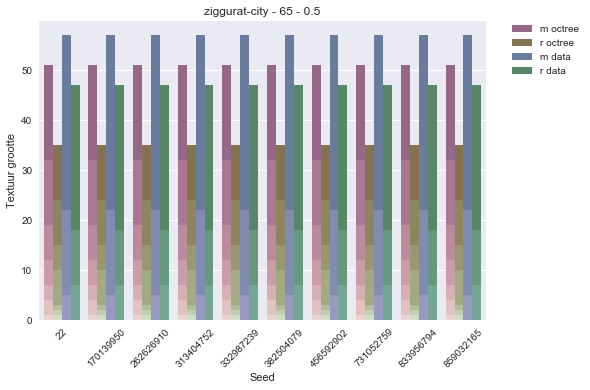

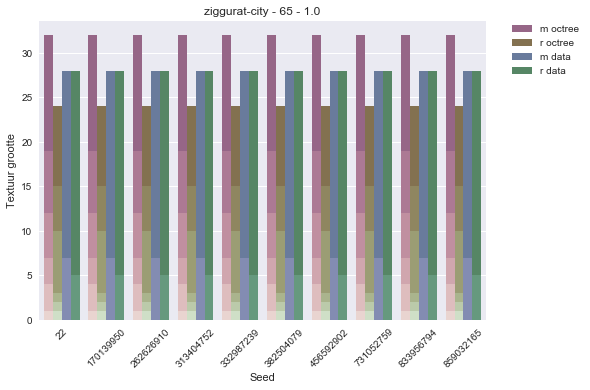

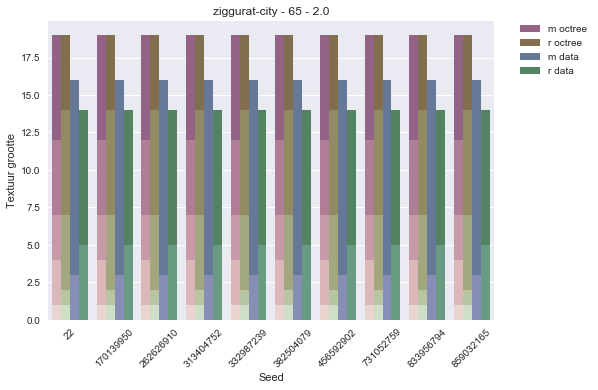

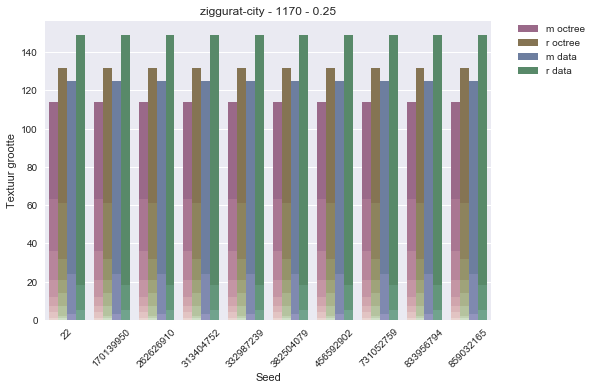

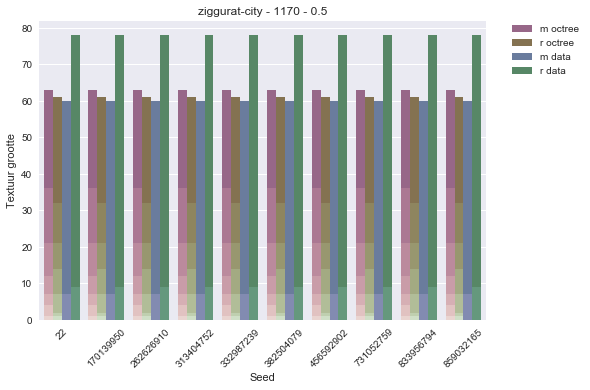

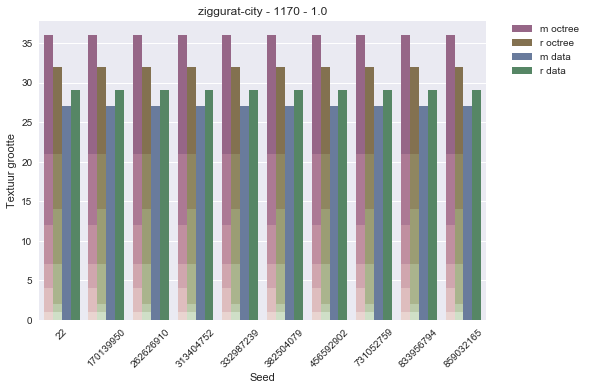

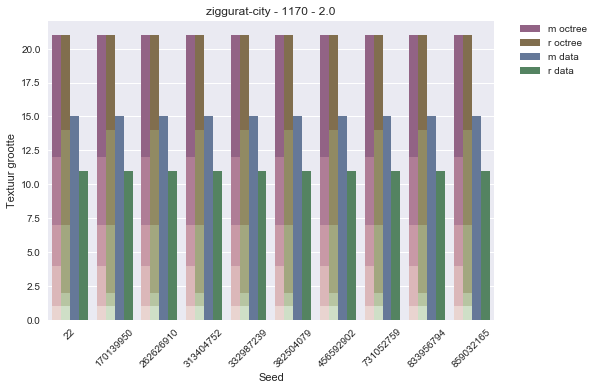

In [170]:
scene = "ziggurat-city"
for l_def in SCENES[scene]:
    for ns in NODE_SIZES:
        bar_plot_mem_usage(scene, l_def, ns)

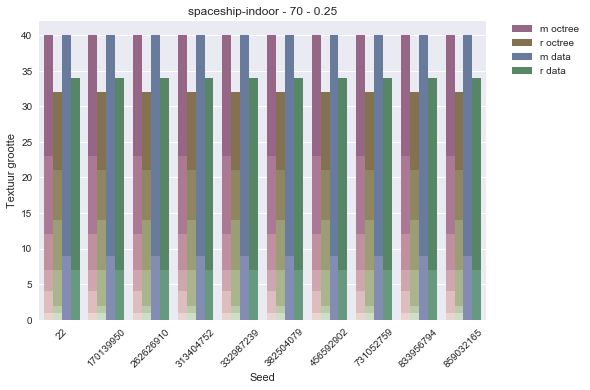

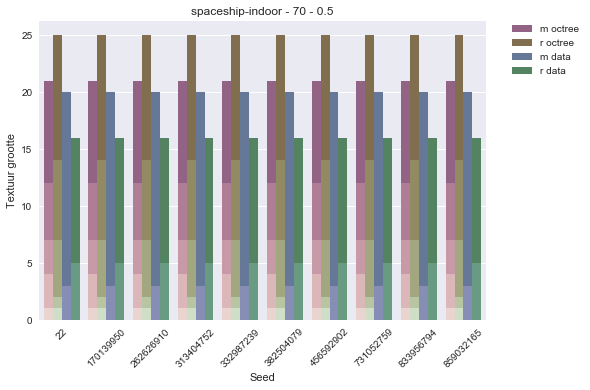

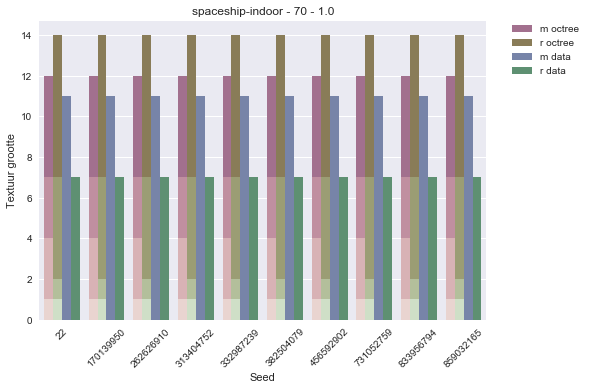

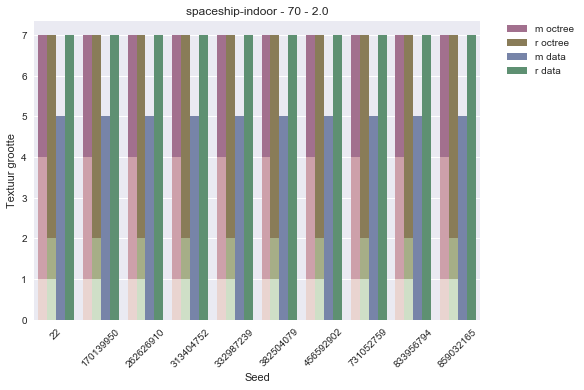

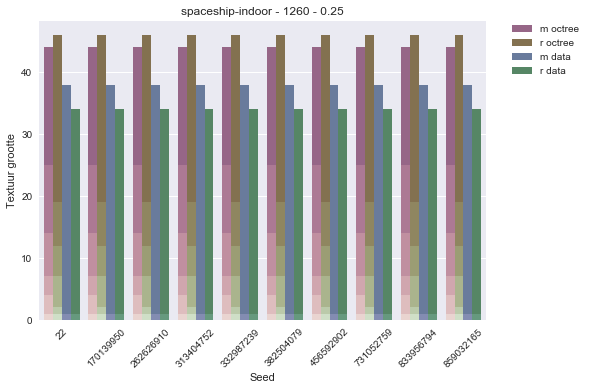

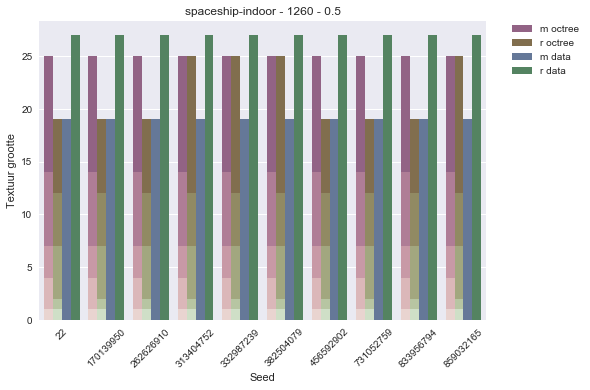

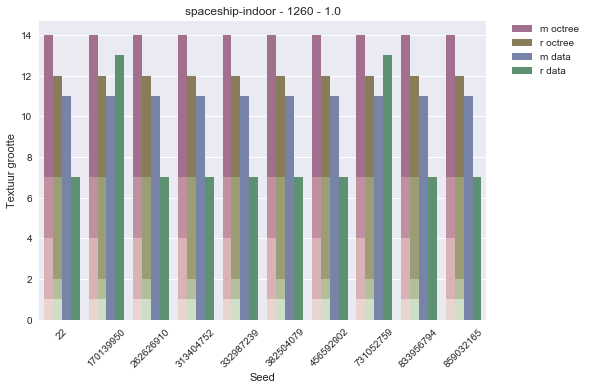

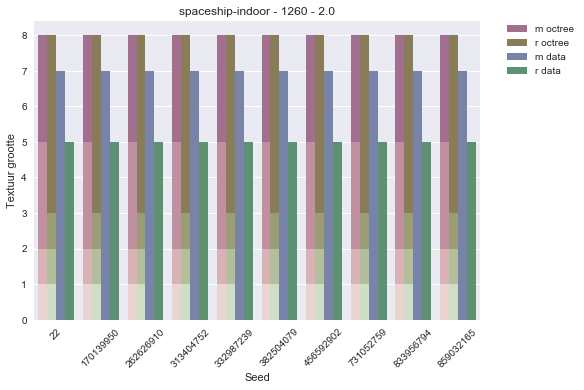

In [171]:
scene = "spaceship-indoor"
for l_def in SCENES[scene]:
    for ns in NODE_SIZES:
        bar_plot_mem_usage(scene, l_def, ns)

In [24]:
def extract_node_size_execution_times():
    output = {}
    
    functions = ["HashedLightManager::addConstructedSLTs",
                 "HashedLightManager::constructEmptyLightOctree",
                 "HashedLightManager::constructLinklessOctree",
                 "HashedLightManager::constructSLTs"]

    
    for scene in SCENES:
        output[scene] = {}
        path_scene = RAW_DATA_ROOT / Path(scene)
        for ld in SCENES[scene]:            
            path_ld = path_scene / Path(ld) / Path("{}".format(STARTING_DEPTH[0]))
            
            l_ns = []
            d_execution_time = { f : [] for f in functions }
            for ns in NODE_SIZES:
                path_ns = path_ld / Path("{}/1.5/".format(ns))

                path_seed = path_ns / Path("22")
                
                for i in range(n_tests):   
                    file_path = path_seed / Path("execution_{}.json".format(i))
                    
                    with open(str(file_path), 'r') as f:
                        data_json = json.loads(f.read())
                        
                    l_ns.append(ns)
                    
                    for f in functions:
                        d_execution_time[f].append(data_json["frames"][0]["functions"][f])
            df_raw = { f : pd.Series(d_execution_time[f]) for f in functions }
            df_raw["node_size"] = pd.Series(l_ns)
            
            output[scene][ld] = pd.DataFrame(df_raw)
    return output

In [25]:
node_size_execution_times = extract_node_size_execution_times()

In [26]:
node_size_execution_times["pipers-alley"]["58#1x_1y_1z"]

pd.DataFrame({"node_size": node_size_execution_times["pipers-alley"]["58#1x_1y_1z"]["node_size"] } )

node_size
0        0.25
1        0.25
2        0.25
3        0.50
4        0.50
5        0.50
6        1.00
7        1.00
8        1.00
9        2.00
10       2.00
11       2.00

In [39]:
def bar_plot_node_size_exec(scene, light_def):
    df_raw = node_size_execution_times[scene][light_def]
    
    functions = ["HashedLightManager::constructEmptyLightOctree",
                 "HashedLightManager::constructSLTs",
                 "HashedLightManager::addConstructedSLTs",
                 "HashedLightManager::constructLinklessOctree",
                 ]
    
    df = pd.DataFrame({"node_size": df_raw["node_size"] })
    df["constructEmptyLightOctree"] = df_raw["HashedLightManager::constructEmptyLightOctree"]
    
    for i in range(1, len(functions)):
        df[functions[i].split("::")[-1]] = df_raw[functions[i]] + df[functions[i-1].split("::")[-1]]

           
    n_levels = len(functions)
    palettes = [sns.cubehelix_palette(int(n_levels * 1.75), start=0.00), 
                sns.cubehelix_palette(int(n_levels * 1.75), start=0.75),
                sns.cubehelix_palette(int(n_levels * 1.75), start=2.25),
                sns.cubehelix_palette(int(n_levels * 1.75), start=1.5),
               ]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    
    for i in range(n_levels -1, -1, -1):
        palette = sns.color_palette([palettes[0][i],])
        sns.barplot(x="node_size", 
                    y=functions[i].split("::")[-1], 
                    data=df, 
                    palette=palette,
                    ax=ax,
                    ci=None,
                    label="layer {}".format(i))
        
    for item in ax.get_xticklabels():
        item.set_rotation(45)  
        
    ax.set(xlabel='Node size', ylabel='Executie tijd (ms)')
        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_title("{} - {}".format(scene, light_def.split('#')[0]))

    plt.show()

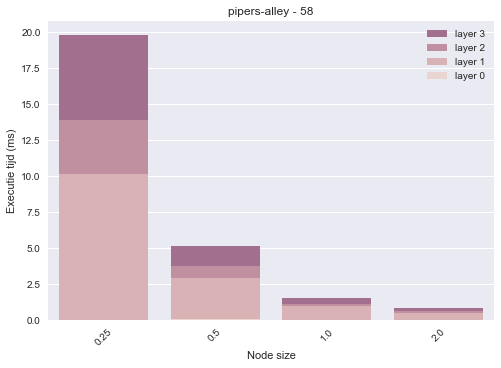

In [40]:
bar_plot_node_size_exec("pipers-alley", "58#1x_1y_1z")

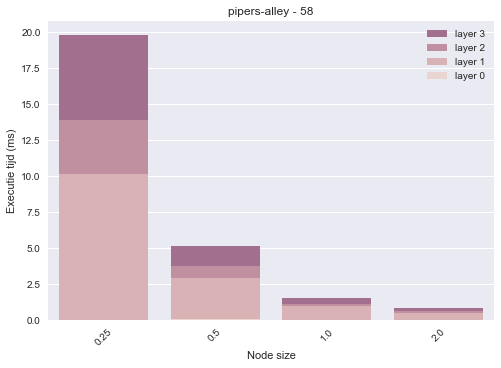

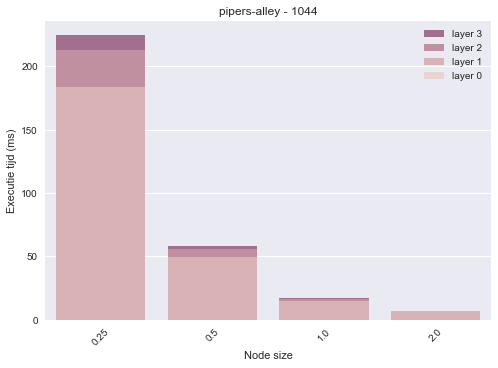

In [41]:
scene = "pipers-alley"
for l_def in SCENES[scene]:
    bar_plot_node_size_exec(scene, l_def)

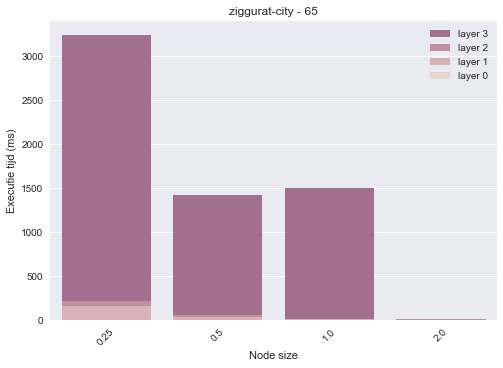

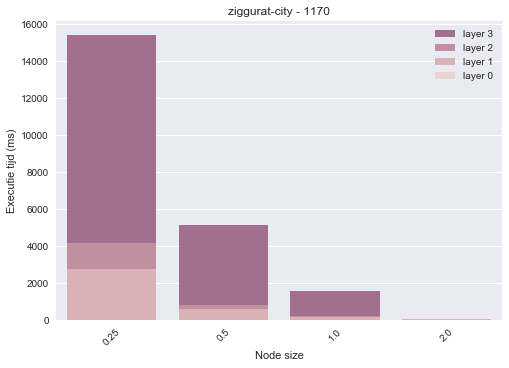

In [42]:
scene = "ziggurat-city"
for l_def in SCENES[scene]:
    bar_plot_node_size_exec(scene, l_def)

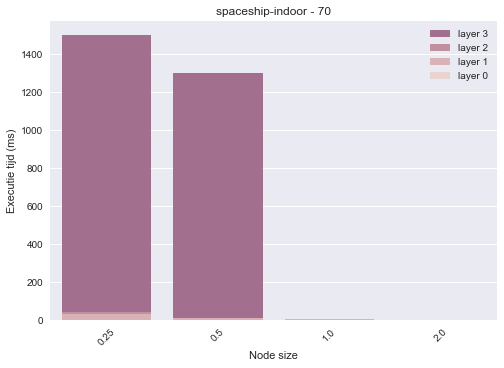

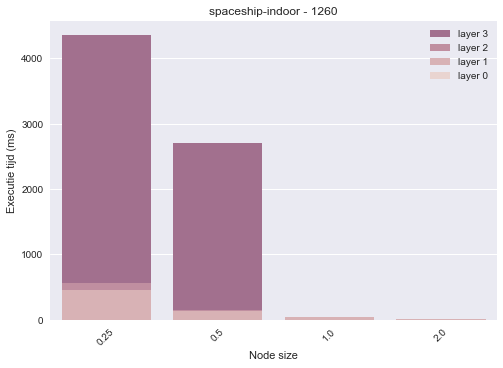

In [43]:
scene = "spaceship-indoor"
for l_def in SCENES[scene]:
    bar_plot_node_size_exec(scene, l_def)

In [46]:
def extract_node_size_memory_tables():
    output = {}
    
    octree_data_types = {"octree m" : ("octree_table", "m"), 
                         "octree r" : ("octree_table", "r"), 
                        }
    data_data_types = { "data m" : ("data_table", "m"), 
                       "data r" : ("data_table", "r"),
                      }
    
    for scene in SCENES:
        output[scene] = {}
        
        path_scene = RAW_DATA_ROOT / Path(scene)
        for ld in SCENES[scene]:
            path_ld = path_scene / Path(ld) / Path("{}".format(STARTING_DEPTH[0]))
            
            output[scene][ld] = {}
            
            node_size_data = {}
            
            n_lvls_max = 0
            
            for ns in NODE_SIZES:
                node_size_data[ns] = {}
                
                file_path = path_ld / Path("{}/1.5/22/memory_0.json".format(ns))
                
                with open(str(file_path), 'r') as f:
                    data_json = json.loads(f.read())
                    
                node_size_data[ns]["n_levels"] = data_json["linkless_octree"]["n_levels"]
                
                if data_json["linkless_octree"]["n_levels"] > n_lvls_max:
                    n_lvls_max = data_json["linkless_octree"]["n_levels"]
                
                node_size_data[ns]["raw_dat"] = data_json["linkless_octree"]["tables"]            
            
            for dt in octree_data_types:   
                output[scene][ld][dt] = {}
                node_sizes = []
                layers = list(list() for x in range(n_lvls_max))
                
                for ns in NODE_SIZES:
                    n_lvls = node_size_data[ns]["n_levels"]
                    
                    node_sizes.append(ns)
                    
                    for i in range(n_lvls):
                        #print("{} | {} | {}".format(dt, ns, i))
                        #print(octree_data_types[dt])
                        #print(node_size_data[ns]["raw_dat"][i])
                        layers[i].append(node_size_data[ns]["raw_dat"][i][octree_data_types[dt][0]][octree_data_types[dt][1]] ** 3)
                    
                    for i in range(n_lvls, n_lvls_max):
                        layers[i].append(0)
                
                df_raw = { "layer {}".format(i) : pd.Series(layers[i]) for i in range(n_lvls_max) }
                df_raw["node_size"] = pd.Series(node_sizes)
                
                output[scene][ld][dt]["df"] = pd.DataFrame(df_raw)
                output[scene][ld][dt]["n_levels"] = n_lvls_max

            
            for dt in data_data_types:
                output[scene][ld][dt] = {}
                node_sizes = []
                layers = list(list() for x in range(n_lvls_max))
                
                for ns in NODE_SIZES:
                    n_lvls = node_size_data[ns]["n_levels"]
                    
                    node_sizes.append(ns)
                    
                    for i in range(n_lvls):
                        if node_size_data[ns]["raw_dat"][i][data_data_types[dt][0]]["exists"]:       
                            #print("{} | {} | {}".format(dt, ns, i))
                            layers[i].append(node_size_data[ns]["raw_dat"][i][data_data_types[dt][0]][data_data_types[dt][1]] ** 3)
                        else:
                            layers[i].append(0)
                    
                    for i in range(n_lvls, n_lvls_max):
                        layers[i].append(0)
                
                df_raw = { "layer {}".format(i) : pd.Series(layers[i]) for i in range(n_lvls_max) }
                df_raw["node_size"] = pd.Series(node_sizes)
                
                output[scene][ld][dt]["df"] = pd.DataFrame(df_raw)
                output[scene][ld][dt]["n_levels"] = n_lvls_max

                
    return output

In [47]:
node_size_memory = extract_node_size_memory_tables()

In [241]:
node_size_memory["pipers-alley"]["58#1x_1y_1z"]["octree m"]["df"]

layer 0  layer 1  layer 2  layer 3  layer 4  layer 5  node_size
0        1       27       27      125      343     1331       0.25
1        1       27       27      125      343        0       0.50
2        1       27       27      125        0        0       1.00
3        1       27       27        0        0        0       2.00

In [242]:
node_size_memory["pipers-alley"]["58#1x_1y_1z"]["octree r"]["df"]

layer 0  layer 1  layer 2  layer 3  layer 4  layer 5  node_size
0        1        1      125      343      125      343       0.25
1        1        1      125      343      125        0       0.50
2        1        1      125      343        0        0       1.00
3        1        1      125        0        0        0       2.00

In [243]:
node_size_memory["pipers-alley"]["58#1x_1y_1z"]["data m"]["df"]

layer 0  layer 1  layer 2  layer 3  layer 4  layer 5  node_size
0        0        0        0        0       27     6859       0.25
1        0        0        0        0     1331        0       0.50
2        0        0        0      343        0        0       1.00
3        0        0      125        0        0        0       2.00

In [244]:
node_size_memory["pipers-alley"]["58#1x_1y_1z"]["data r"]["df"]

layer 0  layer 1  layer 2  layer 3  layer 4  layer 5  node_size
0        0        0        0        0      125     1331       0.25
1        0        0        0        0      343        0       0.50
2        0        0        0      125        0        0       1.00
3        0        0      343        0        0        0       2.00

In [53]:
def bar_plot_node_size_table(scene, light_def, table_type, index=0):
    d_raw = node_size_memory[scene][light_def][table_type]
    
    df_raw = d_raw["df"]
    
    df = pd.DataFrame({"node_size": df_raw["node_size"] })
    df["layer 0"] = df_raw["layer 0"]
    
    for i in range(1, d_raw["n_levels"]):
        df["layer {}".format(i)] = df_raw["layer {}".format(i)] + df["layer {}".format(i - 1)]

           
    n_levels = d_raw["n_levels"]
    palettes = [sns.cubehelix_palette(int(n_levels * 1.75), start=0.00), 
                sns.cubehelix_palette(int(n_levels * 1.75), start=0.75),
                sns.cubehelix_palette(int(n_levels * 1.75), start=2.25),
                sns.cubehelix_palette(int(n_levels * 1.75), start=1.5),
               ]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for i in range(n_levels -1, -1, -1):
        palette = sns.color_palette([palettes[index][i],])
        sns.barplot(x="node_size", 
                    y="layer {}".format(i), 
                    ax=ax,
                    data=df, 
                    palette=palette,
                    label="Laag {}".format(i),
                    ci=None)
        
    ax.set(xlabel='Node size', ylabel='Geheugen gebruik')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    ax.set_title("{} - {} - {}".format(scene, 
                                       light_def.split('#')[0],
                                       table_type
                                      ))


    plt.show()

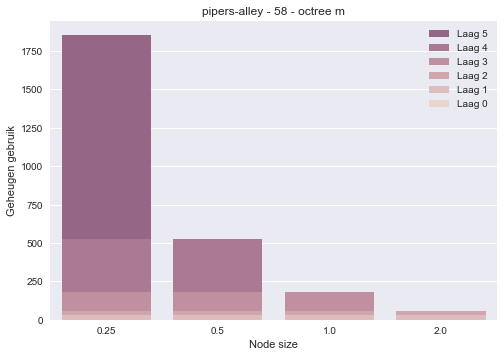

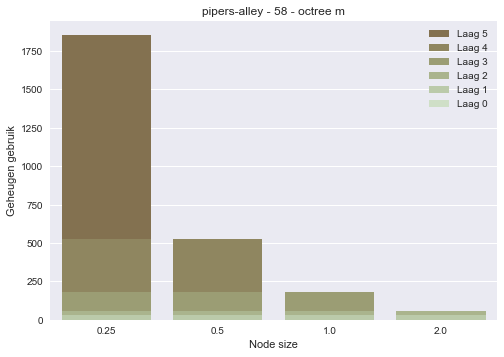

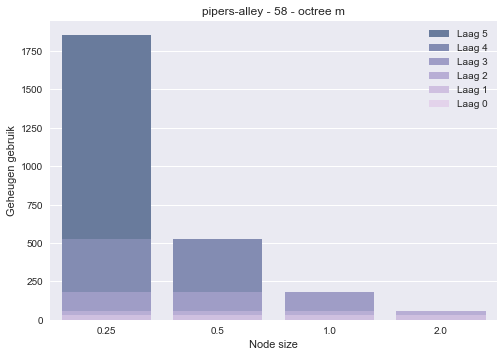

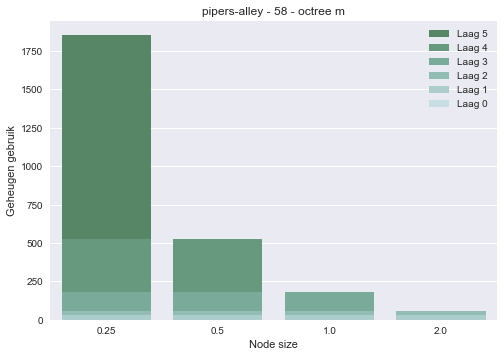

In [54]:
bar_plot_node_size_table("pipers-alley", "58#1x_1y_1z", "octree m", 0)
bar_plot_node_size_table("pipers-alley", "58#1x_1y_1z", "octree m", 1)
bar_plot_node_size_table("pipers-alley", "58#1x_1y_1z", "octree m", 2)
bar_plot_node_size_table("pipers-alley", "58#1x_1y_1z", "octree m", 3)

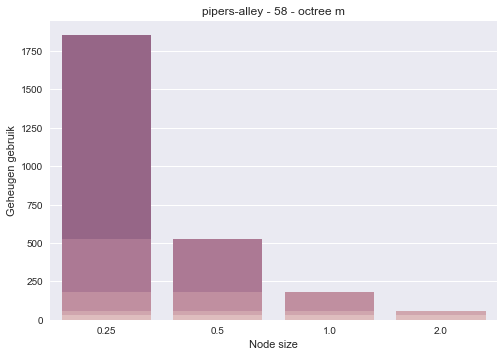

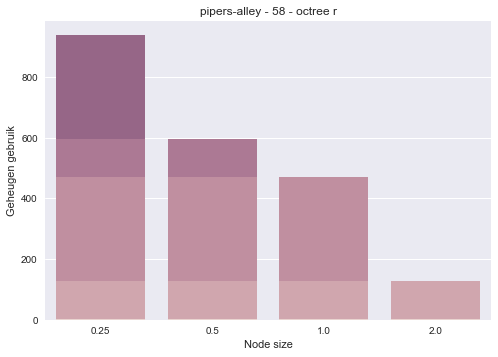

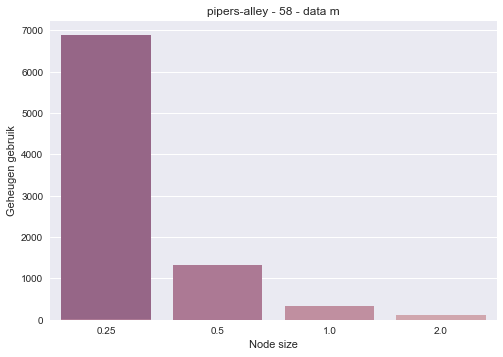

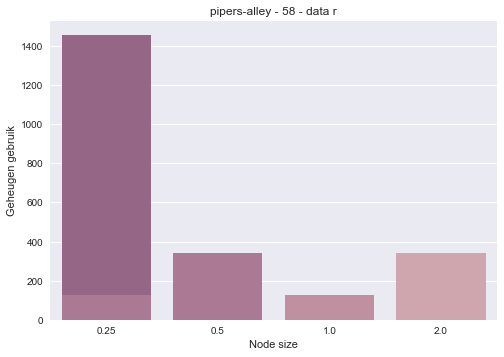

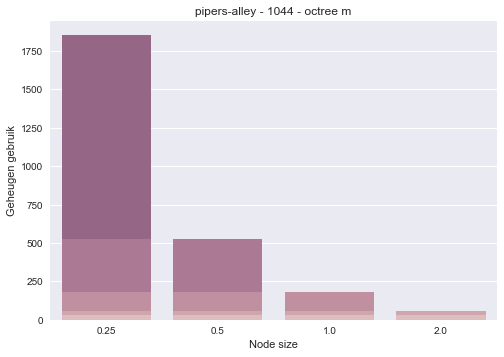

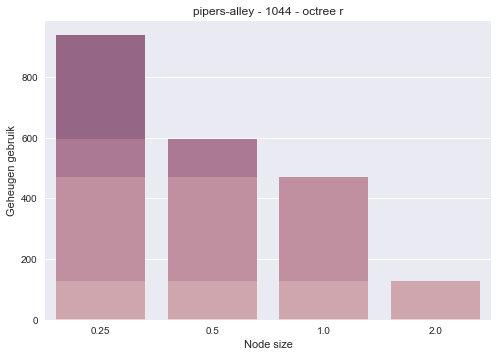

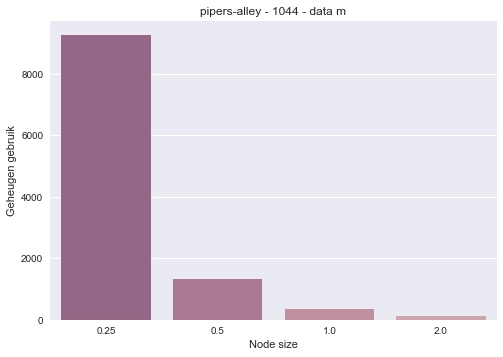

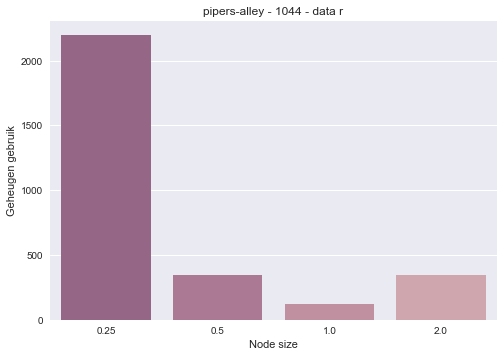

In [260]:
scene = "pipers-alley"
for l_def in SCENES[scene]:
    for dt in ["octree m", "octree r", "data m", "data r"]:
        bar_plot_node_size_table(scene, l_def, dt)

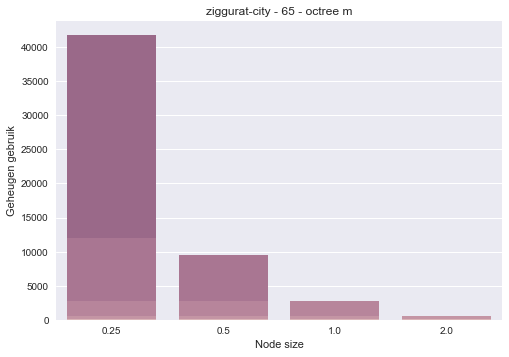

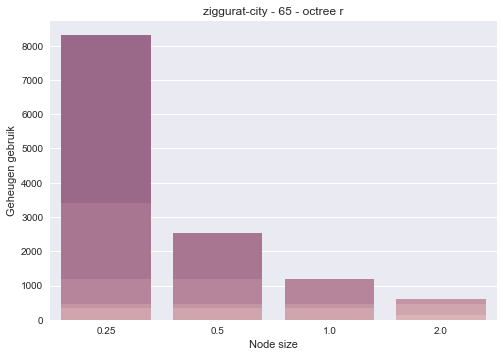

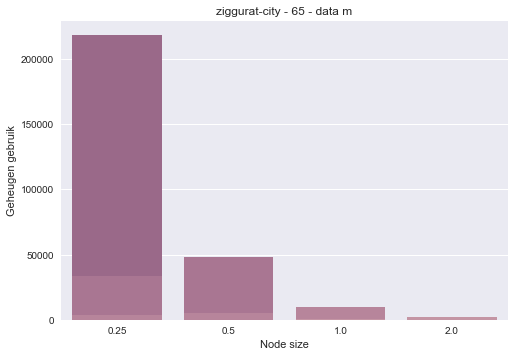

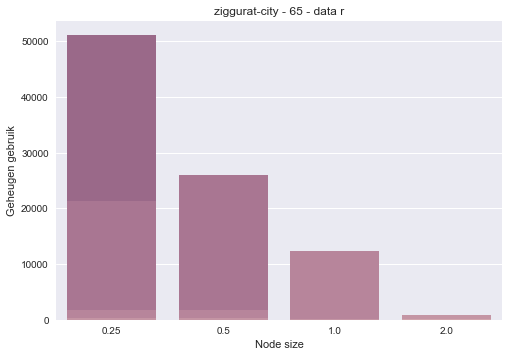

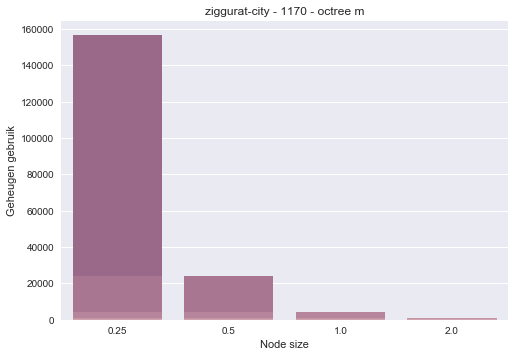

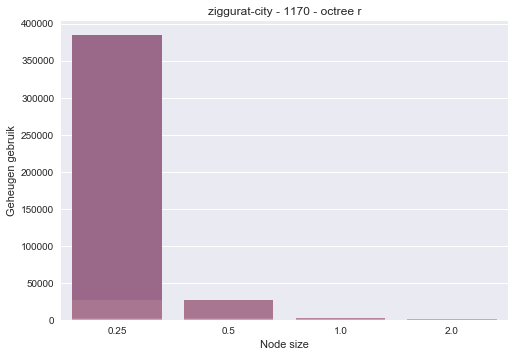

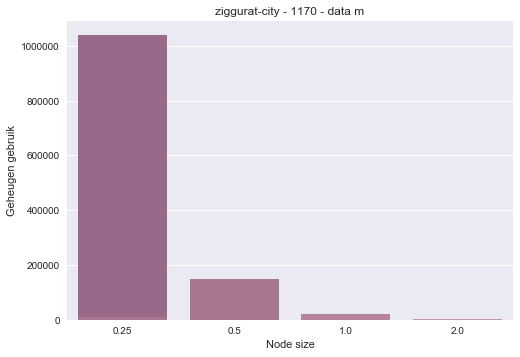

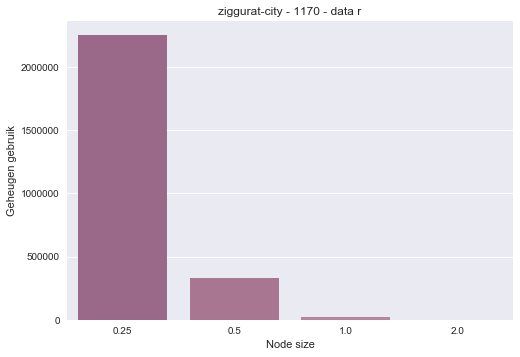

In [261]:
scene = "ziggurat-city"
for l_def in SCENES[scene]:
    for dt in ["octree m", "octree r", "data m", "data r"]:
        bar_plot_node_size_table(scene, l_def, dt)

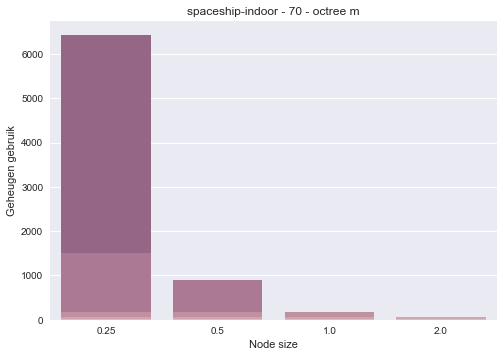

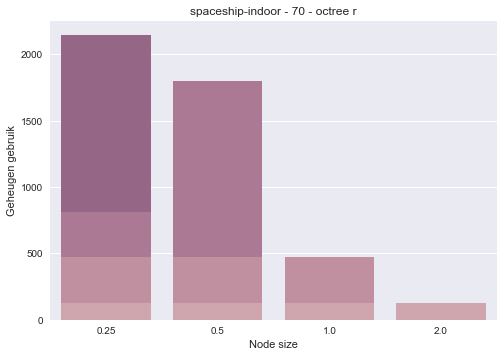

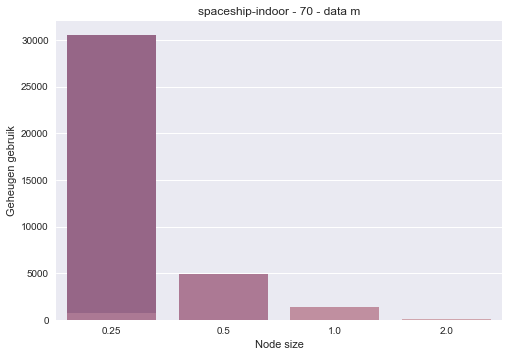

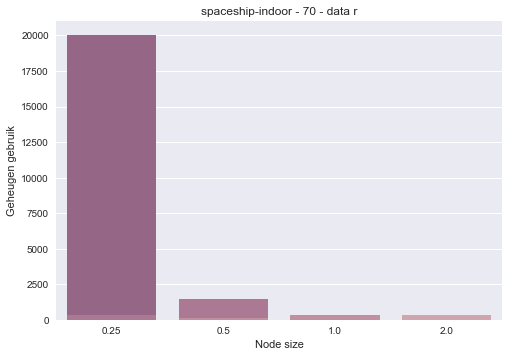

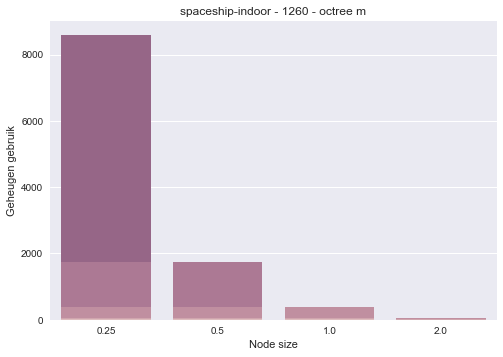

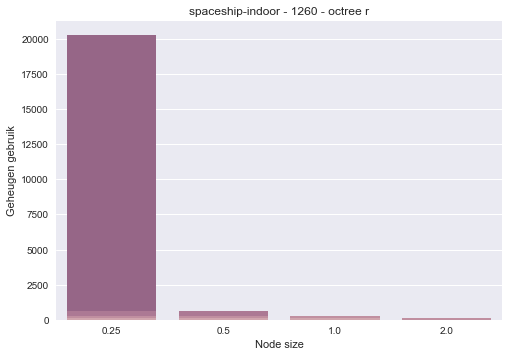

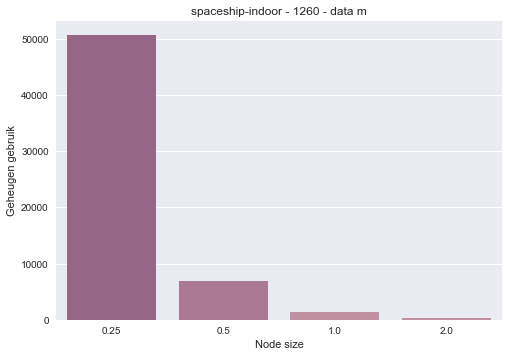

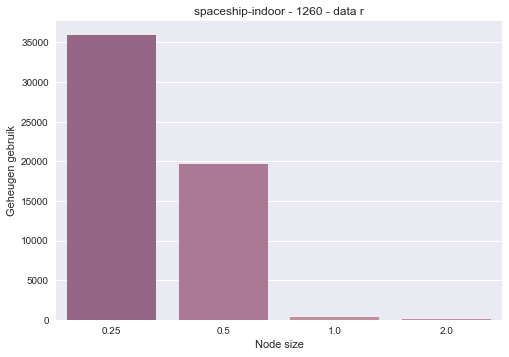

In [262]:
scene = "spaceship-indoor"
for l_def in SCENES[scene]:
    for dt in ["octree m", "octree r", "data m", "data r"]:
        bar_plot_node_size_table(scene, l_def, dt)